# Rossmann Store Sales
                                                                                           Code written by: Dasari Mohan


## PROJECT OBJECTIVE :

Forecast sales using store, promotion, and competitor data

## CONTEXT :

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. We are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column.

Data fields

1.	Id - an Id that represents a (Store, Date) duple within the test set
2.	Store - a unique Id for each store
3.	Sales - the turnover for any given day (this is what you are predicting)
4.	Customers - the number of customers on a given day
5.	Open - an indicator for whether the store was open: 0 = closed, 1 = open
6.	StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
7.	SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
8.	StoreType - differentiates between 4 different store models: a, b, c, d
9.	Assortment - describes an assortment level: a = basic, b = extra, c = extended
10.	CompetitionDistance - distance in meters to the nearest competitor store
11.	CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
12.	Promo - indicates whether a store is running a promo on that day
13.	Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
14.	Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
15.	PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


In [1]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
store_data = pd.read_csv('store.csv')
store_data.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [3]:
train_data = pd.read_csv('train.csv')
train_data.head(5)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
combined_data = pd.merge(store_data,train_data,on='Store')
combined_data.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


## Exploring Data Analysis

In [5]:
combined_data.shape

(1017209, 18)

In [6]:
# Checking for null values
combined_data.isnull().mean()*100

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
dtype: float64

In [7]:
# Unique values
columns = list(combined_data.columns)
columns.remove('Date')
columns.remove('CompetitionDistance')
for i in columns:
    print('Unique values in column :',combined_data[i].unique())

Unique values in column : [   1    2    3 ... 1113 1114 1115]
Unique values in column : ['c' 'a' 'd' 'b']
Unique values in column : ['a' 'c' 'b']
Unique values in column : [ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
Unique values in column : [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values in column : [0 1]
Unique values in column : [nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values in column : [  nan 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values in column : [nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
Unique values in column : [5 4 3 2 1 7 6]
Unique values in column : [ 5263  5020  4782 ... 20362 18841 21237]
Unique values in column : [ 555  546  523 ... 3727 4022 4106]
Unique values in column : [1 0]
Unique values in column : [1 0]
Unique values in column : ['0' 'a' 'b' 'c

## Data Visualization

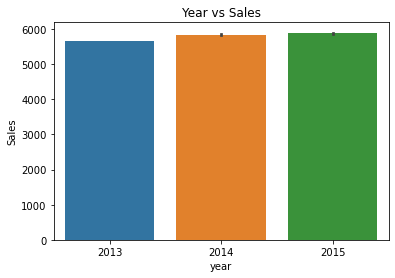

In [20]:
# extracting year and month from Date 
combined_data['year'] = combined_data['Date'].apply(lambda x : int(str(x)[0:4]))
combined_data['month'] = combined_data['Date'].apply(lambda x : int(str(x)[5:7]))

# Sales with respect to year 
sns.barplot(x='year', y='Sales', data=combined_data).set(title='Year vs Sales')
# sns.barplot(x='month',y='Sales', data=combined_data).set(title='Month vs Sales')

plt.show()

#### Observation:
Sales have been increasing year to year

[Text(0.5, 1.0, 'Sales vs Day of Week')]

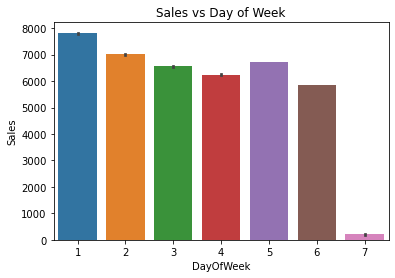

In [23]:
sns.barplot(x='DayOfWeek',y='Sales',data=combined_data).set(title='Sales vs Day of Week')

#### Observation
Sales on 1 (Monday) and 5 (Friday) are the highest

[Text(0.5, 1.0, 'Sales on Promo')]

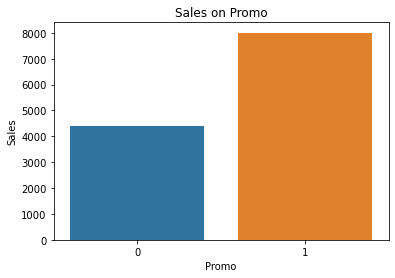

In [25]:
# Lets see how promo is impacting sales
sns.barplot(x='Promo',y='Sales',data=combined_data).set(title='Sales on Promo')

#### Observation:
Customers are definately attracted by Promo codes thus sales are higher when there is a Promo code in a Store

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


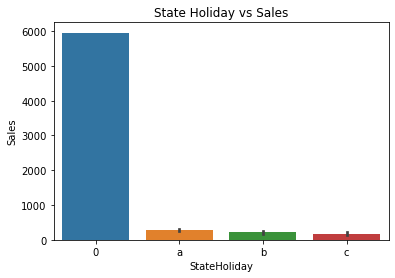

In [26]:
# StateHoliday column has values 0 & "0", So, we need to change values with 0 to "0"

combined_data['StateHoliday'].loc[combined_data['StateHoliday'] == 0] = '0'

# Sales with respect to State Holiday
sns.barplot(x='StateHoliday', y='Sales', data=combined_data).set(title='State Holiday vs Sales')
plt.show()

#### Observation:

Most stores are closed on State Holidays that's why we can see that there are very less sales in a,b,c 

where

a = Public Holiday,
b = Easter Holiday,
c = Chirstmas,
0 = No Holiday, Working day

[Text(0.5, 1.0, 'School Holiday vs Sales')]

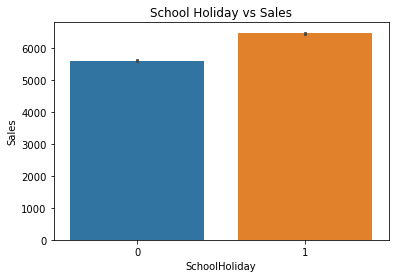

In [27]:
# Sales with respect to School Holiday
sns.barplot(x='SchoolHoliday', y='Sales', data=combined_data).set(title='School Holiday vs Sales')

#### Observation:
On School Holidays there are more sales

[Text(0.5, 1.0, 'StoreType vs Sales')]

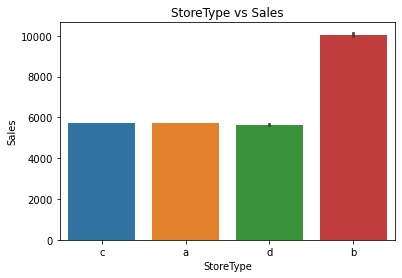

In [28]:
# Sales with respect to Storetype
sns.barplot(x='StoreType', y='Sales', data=combined_data).set(title='StoreType vs Sales')

#### Observation:
Of all a,b,c,d are store models b type stores have the highest sales

[Text(0.5, 1.0, 'Assortment vs Sales')]

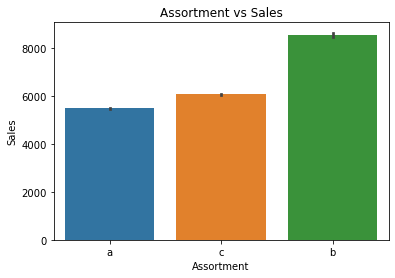

In [29]:
# Sales with respect to Assortment
sns.barplot(x='Assortment', y='Sales', data=combined_data).set(title='Assortment vs Sales')

#### Observation:
Assortment level 'b' have the highest sales

### Filling Missing Values and Removing Outliers
Few columns have high number of missing values, so we need to fill them with appropriate method for better result.

##### Approach
1: The null values in Column Promo2SinceWeek, Promo2SinceYear, PromoInterval is due to Promo2 is 0 for those stores. So we would fill all the null values in these columns with 0.

2: Since Competition Distance for 3 stores isn't given so we could fill it with mean of the distance given for all other stores

3: CompetitionOpenSinceMonth, CompetitionOpenSinceYear can be filled using the most occuring month and year respectively.

In [8]:
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [9]:
train_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

#### Observation:
Here we can clearly see that only store data has null values in it and we need to fill missing values in store data

In [17]:
# Filling Promo2SinceWeek, Promo2SinceYear, PromoInterval with 0
store_data.update(store_data[['Promo2SinceWeek','Promo2SinceYear','PromoInterval']].fillna(value=0,inplace=True))

In [21]:
# Filling CompetitionDistance with mean distance
mean_CompetitionDistance = store_data['CompetitionDistance'].mean()
store_data.update(store_data['CompetitionDistance'].fillna(value=mean_CompetitionDistance,inplace=True))

In [22]:
# Filling CompetitionOpenSinceMonth, CompetitionOpenSinceYear with most occuring month and year respectively
mode_CompetitionOpenSinceMonth = store_data['CompetitionOpenSinceMonth'].mode()[0]
mode_CompetitionOpenSinceYear = store_data['CompetitionOpenSinceYear'].mode()[0]

store_data.update(store_data['CompetitionOpenSinceMonth'].fillna(value=mode_CompetitionOpenSinceMonth,inplace=True))
store_data.update(store_data['CompetitionOpenSinceYear'].fillna(value=mode_CompetitionOpenSinceYear,inplace=True))

store_data.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [24]:
combined_data = pd.merge(store_data,train_data,on='Store')
print(combined_data.shape)
combined_data.head(5)

(1017209, 18)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,2015-07-27,6102,612,1,1,0,1


In [25]:
combined_data.isnull().mean()*100

Store                        0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
DayOfWeek                    0.0
Date                         0.0
Sales                        0.0
Customers                    0.0
Open                         0.0
Promo                        0.0
StateHoliday                 0.0
SchoolHoliday                0.0
dtype: float64

#### Great ! We don't have any null values, we can proceed further

<AxesSubplot:xlabel='CompetitionDistance', ylabel='Sales'>

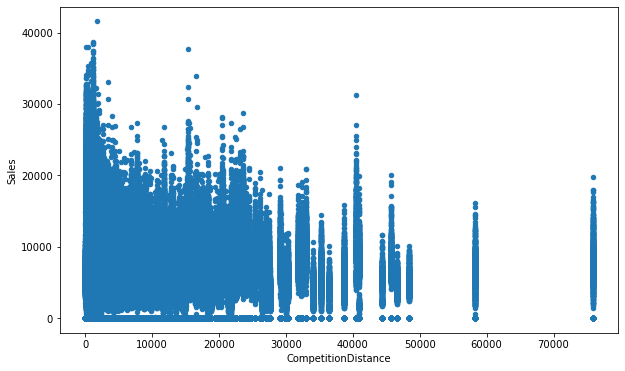

In [27]:
combined_data.plot(x='CompetitionDistance',y='Sales',kind='scatter',figsize =(10,6))

#### Observation:
From the above plot we can say that more nearer the compitetor store are the more sales in Rossman stores.

## Finding Outliers

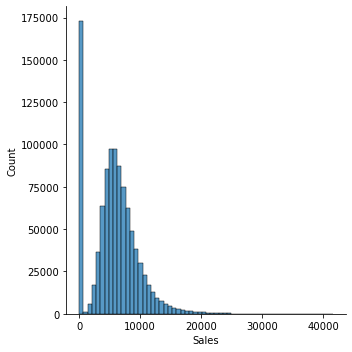

In [31]:
sns.displot(combined_data,x='Sales',bins=60)

#### Observation:
As we can see in the distribution plot Sales greater than 25k are very less,therefore they might be the outliers.

### Z-Score: If the Z-Score of any datapoint is greater than 3(threshold) then that can be considered as an Outlier

Total No.of outliers in dataset:  9731


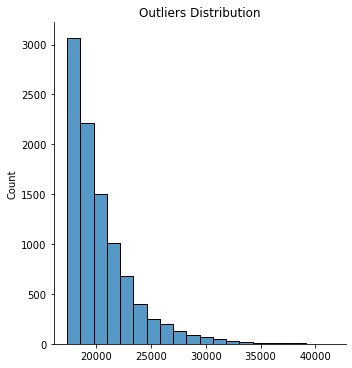

In [37]:
mean_sales = np.mean(combined_data['Sales'])
std_sales = np.std(combined_data['Sales'])

threshold = 3

outliers = []
for i in combined_data['Sales']:
    z_score = (i-mean_sales)/std_sales
    if z_score > threshold:
        outliers.append(i)
        
print('Total No.of outliers in dataset: ', len(outliers))

sns.displot(x=outliers,bins=20).set(title='Outliers Distribution')

In [48]:
# Percentage of Outliers 
zero_sales = combined_data.loc[combined_data['Sales']==0]

sales_greater_than_25k = combined_data.loc[combined_data['Sales'] > 25000]

print('Length of the dataset:', len(combined_data))
print('Percentage of Zeros in dataset: %.3f%%' %((len(zero_sales)/len(combined_data))*100))
print('Percentage of sales greater than 25k in dataset: %.3f%% ' %((len(sales_greater_than_25k)/len(combined_data))*100))

Length of the dataset: 1017209
Percentage of Zeros in dataset: 16.995%
Percentage of sales greater than 25k in dataset: 0.075% 


#### Obervation:
We can drop the sales datapoints which are greater than 25k as they are very less percentage of the dataset and are probably outliers

In [58]:
combined_data.drop(combined_data.loc[combined_data['Sales'] > 25000].index,inplace=True)

In [59]:
combined_data.shape

(1016451, 18)

### Some exceptional cases
Looking for a scenerio where the Stores are open and yet there is no sales on that day

In [62]:
no_sales = combined_data.loc[(combined_data['Sales']==0) & (combined_data['Open'] == 1) & (combined_data['StateHoliday'] == 0) 
                               & (combined_data['SchoolHoliday'] == 0)]
print(no_sales.shape)
no_sales.head()

(12, 18)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
22589,25,c,a,430.0,4.0,2003.0,0,0.0,0.0,0,4,2014-02-13,0,0,1,0,0,0
22590,25,c,a,430.0,4.0,2003.0,0,0.0,0.0,0,3,2014-02-12,0,0,1,0,0,0
25212,28,a,a,1200.0,10.0,2014.0,1,6.0,2015.0,"Mar,Jun,Sept,Dec",4,2014-09-04,0,0,1,1,0,0
205303,227,a,a,2370.0,9.0,2013.0,0,0.0,0.0,0,4,2014-09-11,0,0,1,0,0,0
297110,327,c,c,1390.0,12.0,2004.0,0,0.0,0.0,0,3,2014-03-12,0,0,1,0,0,0


#### Observation:
There are total 12 dates where there is no record of sales even without any holidays. We can remove these data points too as they are an exceptional case

In [63]:
combined_data.drop(combined_data.loc[(combined_data['Sales']==0) & (combined_data['Open'] == 1)
                                     & (combined_data['StateHoliday'] == 0) & 
                                     (combined_data['SchoolHoliday'] == 0)].index,inplace=True)
print(combined_data.shape)

(1016439, 18)


In [64]:
combined_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,2015-07-27,6102,612,1,1,0,1


### Converting Categorical Variable to Numeric

In [67]:
combined_data['Year'] = combined_data['Date'].apply(lambda x: int(str(x)[0:4]))
combined_data['Month'] = combined_data['Date'].apply(lambda x: int(str(x)[5:7]))
combined_data.drop(['Date'],axis=1,inplace=True)

combined_data.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,5,5263,555,1,1,0,1,2015,7
1,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,4,5020,546,1,1,0,1,2015,7
2,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,3,4782,523,1,1,0,1,2015,7
3,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2,5011,560,1,1,0,1,2015,7
4,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,6102,612,1,1,0,1,2015,7


In [74]:
combined_data.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
DayOfWeek                      int64
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
Year                           int64
Month                          int64
dtype: object

In [77]:
# StateHoliday column has values 0 & "0", So, we need to change values with 0 to "0"

combined_data['StateHoliday'].loc[combined_data['StateHoliday'] == 0] = '0'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [81]:
# PromoInterval column has values 0 & "0", So, we need to change values with 0 to "0"

combined_data['PromoInterval'].loc[combined_data['PromoInterval'] == 0] = '0'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [82]:
# encoding all categorical varibale to numeric values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

combined_data['StoreType'] = label_encoder.fit_transform(combined_data['StoreType'])
combined_data['Assortment'] = label_encoder.fit_transform(combined_data['Assortment'])
combined_data['StateHoliday'] = label_encoder.fit_transform(combined_data['StateHoliday'])
combined_data['PromoInterval'] = label_encoder.fit_transform(combined_data['PromoInterval'])

combined_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
0,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,5,5263,555,1,1,0,1,2015,7
1,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,4,5020,546,1,1,0,1,2015,7
2,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,3,4782,523,1,1,0,1,2015,7
3,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,2,5011,560,1,1,0,1,2015,7
4,1,2,0,1270.0,9.0,2008.0,0,0.0,0.0,0,1,6102,612,1,1,0,1,2015,7


In [83]:
# Correlation
correlation = combined_data.corr()
correlation

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Store,1.000000,-0.021410,0.004245,-0.026307,-0.037458,-0.000062,0.008589,0.011110,0.008622,0.001989,0.000283,0.004593,0.024109,-0.000097,-0.000208,0.000482,0.000552,0.000303,0.001444
StoreType,-0.021410,1.000000,0.232933,0.077866,0.040229,0.043589,0.088682,0.059524,0.088626,0.088430,-0.000216,-0.011098,-0.141081,-0.003156,0.000032,0.001318,0.000054,-0.001587,-0.007517
Assortment,0.004245,0.232933,1.000000,0.146370,0.035433,0.092480,0.008135,-0.030344,0.008182,0.039561,0.000095,0.076279,0.008024,0.002999,0.000247,-0.001403,-0.002581,0.001454,0.007404
CompetitionDistance,-0.026307,0.077866,0.146370,1.000000,-0.048702,0.020915,-0.140110,-0.123945,-0.140173,-0.129411,-0.000128,-0.017254,-0.101805,0.008155,0.000360,-0.000393,-0.003664,0.000664,0.003692
CompetitionOpenSinceMonth,-0.037458,0.040229,0.035433,-0.048702,1.000000,0.058225,0.021133,0.019334,0.021143,0.014304,-0.000093,-0.021269,-0.021634,0.001608,0.000234,0.000841,0.000102,-0.000162,-0.000249
CompetitionOpenSinceYear,-0.000062,0.043589,0.092480,0.020915,0.058225,1.000000,-0.022557,-0.027402,-0.022577,-0.025280,-0.000136,0.008420,0.006131,0.002527,0.000218,-0.001447,0.001840,0.000628,0.003229
Promo2,0.008589,0.088682,0.008135,-0.140110,0.021133,-0.022557,1.000000,0.759135,0.999999,0.905080,0.000073,-0.089048,-0.148849,-0.008068,-0.000715,0.004867,-0.006891,-0.005096,-0.025139
Promo2SinceWeek,0.011110,0.059524,-0.030344,-0.123945,0.019334,-0.027402,0.759135,1.000000,0.758949,0.678924,0.000167,-0.042568,-0.097312,-0.007271,-0.001037,0.004651,-0.006680,-0.006235,-0.031098
Promo2SinceYear,0.008622,0.088626,0.008182,-0.140173,0.021143,-0.022577,0.999999,0.758949,1.000000,0.905144,0.000073,-0.089064,-0.148829,-0.008066,-0.000715,0.004868,-0.006894,-0.005097,-0.025145
PromoInterval,0.001989,0.088430,0.039561,-0.129411,0.014304,-0.025280,0.905080,0.678924,0.905144,1.000000,0.000062,-0.083892,-0.135350,-0.006954,-0.000636,0.004160,-0.006456,-0.004555,-0.022488


<AxesSubplot:>

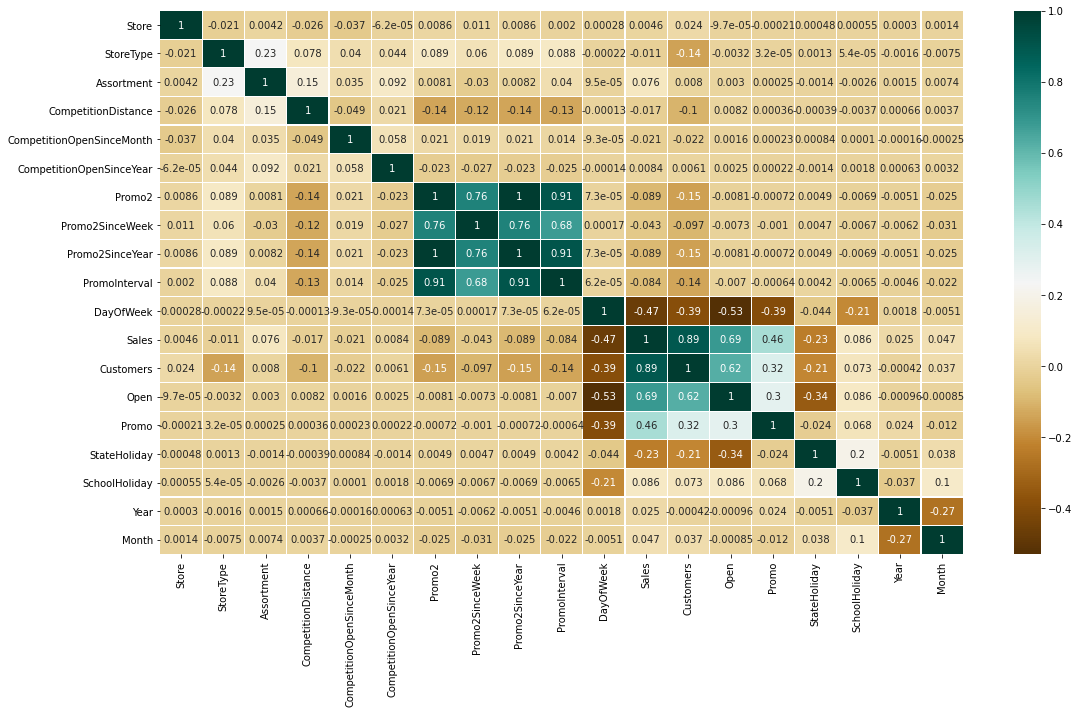

In [90]:
# Heat Map
plt.figure(figsize=(18,10))
sns.heatmap(correlation, annot=True, linewidths=0.2, cmap='BrBG')

#### Observation:
Correlation map shows

Sales is highly correlated with Customers, Open and Promo code and minorly correlated to school holidays


## Buliding a Regression Model

#### Here we want our ML model to predict sales only when they are open and we know that there will be no sales if the store is closed

In [92]:
combined_data_open = combined_data[combined_data['Open']==1]
combined_data_closed = combined_data[combined_data['Open']==0]

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math

X_train, X_test, y_train, y_test_open = train_test_split(combined_data_open.drop(['Sales','Customers','Open'],axis=1),
                                                        combined_data_open['Sales'], test_size=0.2, random_state=23)

In [94]:
X_train.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'DayOfWeek',
       'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month'],
      dtype='object')

In [97]:
y_train.head()

926196     7305
487570     9210
162025    11952
30856      6511
68341      5128
Name: Sales, dtype: int64

In [100]:
y_test_closed = np.zeros(combined_data_closed.shape[0])
y_test = np.append(y_test_open, y_test_closed)

## Linear Regression Algorithm

In [101]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [102]:
prediction_open = model.predict(X_test)
prediction_closed = np.zeros(combined_data_closed.shape[0])

y_predict = np.append(prediction_open,prediction_closed)

In [103]:
# Performance of the model

print('r2_score:',r2_score(y_test,y_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test,y_predict))
print('Root mean squared error: ', math.sqrt(mean_squared_error(y_test,y_predict)))

r2_score: 0.7781562552711293
Mean absolute error: 993.04
Root mean squared error:  1918.6264163243095


Text(0, 0.5, 'Predicted values')

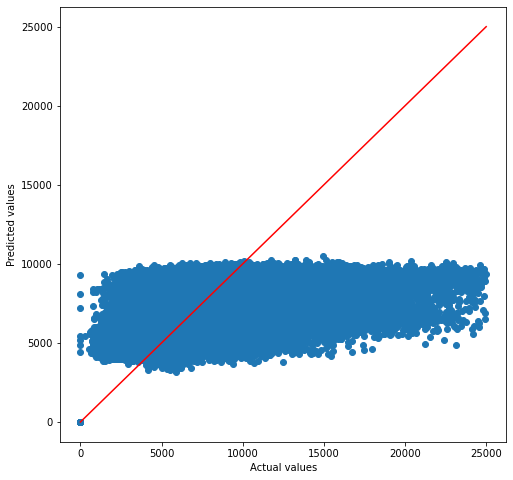

In [105]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predict)

p1 = max(max(y_predict),max(y_test))
p2 = min(min(y_predict),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

#### Observation:
From the above plot we can see that Linear regression model is performing badly as its not making any predictions more than 10000 even for 25000 sales.

## SGD Regression Algorithm

r2_score: -1.885259728733604e+23
Mean absolute error: 908895056154506.38
Root mean squared error:  1768692854310790.2


Text(0, 0.5, 'Predicted values')

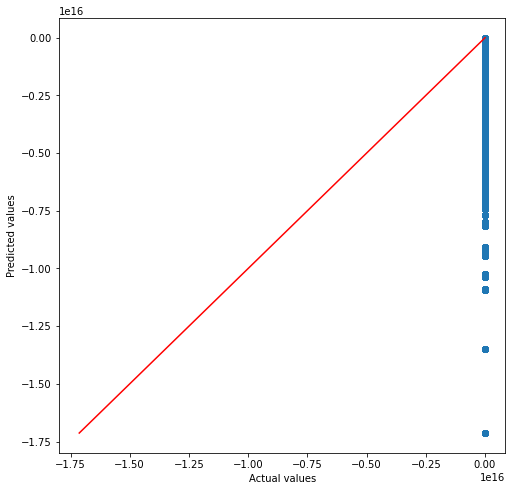

In [106]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor()
model.fit(X_train,y_train)

prediction_open = model.predict(X_test)
prediction_closed = np.zeros(combined_data_closed.shape[0])

y_predict = np.append(prediction_open,prediction_closed)

# Performance of the model

print('r2_score:',r2_score(y_test,y_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test,y_predict))
print('Root mean squared error: ', math.sqrt(mean_squared_error(y_test,y_predict)))

plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predict)

p1 = max(max(y_predict),max(y_test))
p2 = min(min(y_predict),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

#### Observation:
The SGD regressor is performing worse than Linear Regression as its giving negative r2 score, lets see other regression models

## Decision Tree Regressor

r2_score: 0.9518686460839052
Mean absolute error: 419.83
Root mean squared error:  893.6775848221679


Text(0, 0.5, 'Predicted values')

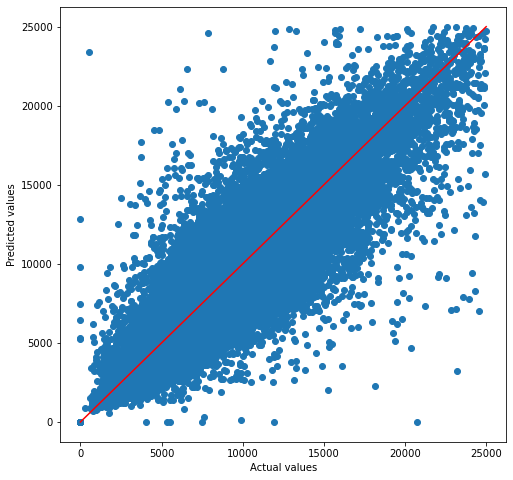

In [107]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train,y_train)

prediction_open = model.predict(X_test)
prediction_closed = np.zeros(combined_data_closed.shape[0])

y_predict = np.append(prediction_open,prediction_closed)

# Performance of the model

print('r2_score:',r2_score(y_test,y_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test,y_predict))
print('Root mean squared error: ', math.sqrt(mean_squared_error(y_test,y_predict)))

plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predict)

p1 = max(max(y_predict),max(y_test))
p2 = min(min(y_predict),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

#### Observation:
The decision tree regressor performing well compared to Linear and SGD regressors

## Random Forest Regressor

r2_score: 0.9659139304456031
Mean absolute error: 355.11
Root mean squared error:  752.0648461163908


Text(0, 0.5, 'Predicted values')

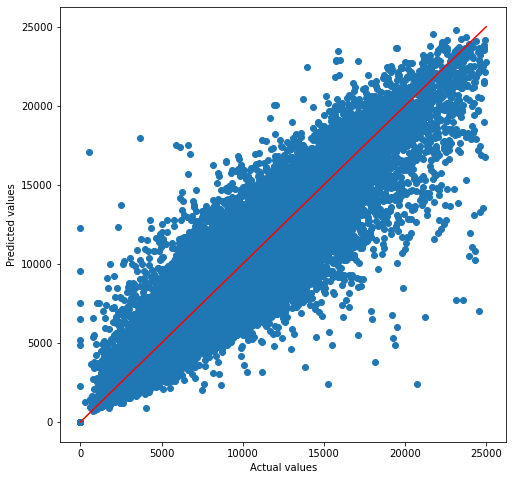

In [110]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(n_estimators=100)
random_forest_model.fit(X_train,y_train)

prediction_open = random_forest_model.predict(X_test)
prediction_closed = np.zeros(combined_data_closed.shape[0])

y_predict = np.append(prediction_open,prediction_closed)

# Performance of the model

print('r2_score:',r2_score(y_test,y_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(y_test,y_predict))
print('Root mean squared error: ', math.sqrt(mean_squared_error(y_test,y_predict)))

plt.figure(figsize=(8,8))
plt.scatter(y_test,y_predict)

p1 = max(max(y_predict),max(y_test))
p2 = min(min(y_predict),min(y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

#### Observation:
Random Forest regressor had the lowest error as compared to other models, which means it is better at predicting sales than other models.

### Understanding the important features

In [116]:
# getting weights of all the features used in the data
feature_importance = random_forest_model.feature_importances_
feature_importance

array([0.17843767, 0.03341407, 0.02771767, 0.21285143, 0.06806114,
       0.07374259, 0.00240777, 0.02996334, 0.03577271, 0.01397614,
       0.08072961, 0.14254513, 0.0011992 , 0.01284554, 0.02392037,
       0.06241562])

In [115]:
# features used
columns = list(X_train.columns)
columns

['Store',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval',
 'DayOfWeek',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'Year',
 'Month']

In [117]:
# Lets make a dataframe consists of features and values
feature_importance_df = pd.DataFrame({'Features':columns, 'Values':feature_importance})
feature_importance_df

,Features,Values
0,Store,0.178438
1,StoreType,0.033414
2,Assortment,0.027718
3,CompetitionDistance,0.212851
4,CompetitionOpenSinceMonth,0.068061
5,CompetitionOpenSinceYear,0.073743
6,Promo2,0.002408
7,Promo2SinceWeek,0.029963
8,Promo2SinceYear,0.035773
9,PromoInterval,0.013976


In [118]:
feature_importance_df.sort_values(by=["Values"], inplace=True, ascending=False)
feature_importance_df

,Features,Values
3,CompetitionDistance,0.212851
0,Store,0.178438
11,Promo,0.142545
10,DayOfWeek,0.080730
5,CompetitionOpenSinceYear,0.073743
4,CompetitionOpenSinceMonth,0.068061
15,Month,0.062416
8,Promo2SinceYear,0.035773
1,StoreType,0.033414
7,Promo2SinceWeek,0.029963


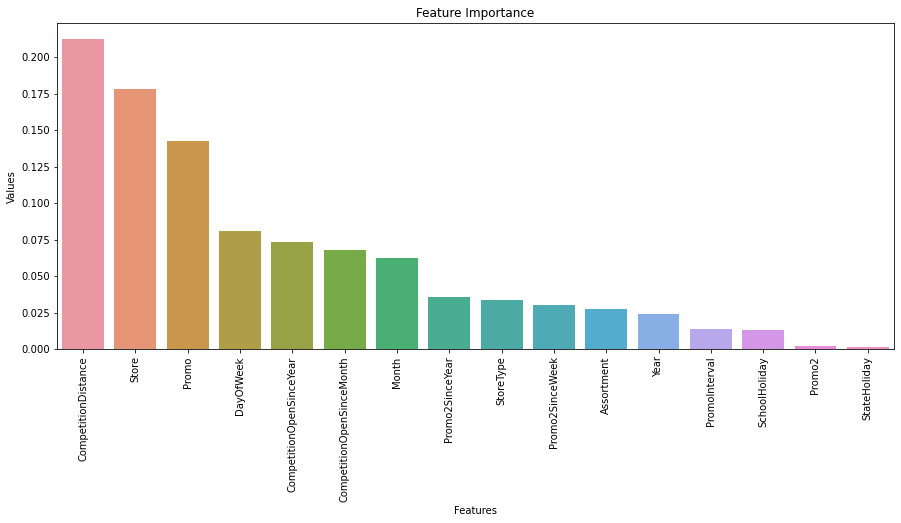

In [122]:
# Feature Importance
plt.figure(figsize=(15,6))

sns.barplot(x=feature_importance_df['Features'], y=feature_importance_df['Values'],
            data = feature_importance_df ).set(title='Feature Importance')

plt.xticks(rotation=90)
plt.show()

# Conclusion:

1. Closer competiton distance make stores more competitive and thus by using Promo codes can help them to boost their sales.

2. Store Type affects the sales - Of all a,b,c,d store models 'b' type stores have the highest sales.

3. Promo code can help increase in the competition and lead to more sales.

4. Sales on 1 (Monday) and 5 (Friday) are the highest.

5. Assortment level 'b' have the highest sales.

6. Customers are definately attracted by Promo codes thus sales are higher when there is a Promo code in a Store

7. Since most of the stores are closed on Holidays, the feature state holidays has no effect on sales